Data From : Kaggle -> https://www.kaggle.com/competitions/cifar-10/data

# ***Problem Statement : ***

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class.   

CIFAR :  Canadian Institute for Advanced Research 

** Data are splitted 90 % of Training Dataet and 10% of Testing Dataset 

**Training Image**s : 50,000 Images .
**Test Images** : 10,000 Images 
 

 Dataset Links : https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz 

 This Dataset contain 163 MB and it take the huge time to split the data into train and test , 

 So Kaggle preserved the train/test split from the original dataset 

**train.7z** - a folder containing the training images in png format

**test.7z** - a folder containing the test images in png format

The label classes in the dataset are:
*   airplane
*   automobile 
*   bird 
*   cat 
*   deer 
*   dog 
*   frog 
*   horse 
*   ship 
*   truck

                        ** SAMPLE DATA**



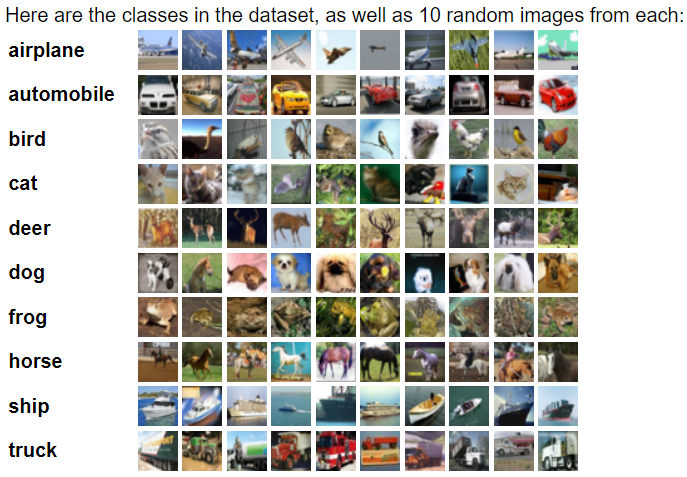

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Data are inbuilt in Tensorflow Package

In [4]:
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
data=datasets.cifar10.load_data()

In [6]:
(X_train, y_train), (X_test,y_test) = data


Here , We Training consists of 50,000 records 

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

Here , We Testing consists of 10,000 records 

In [12]:
X_test.shape

(10000, 32, 32, 3)

In [13]:
y_test.shape

(10000, 1)

First, we look the Target Variables (y=classes) 

In [17]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

**NOTES :**  y_train is a 2D array, for our classification having 1D array 
 
 so we will convert this to now 1D array

In [22]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:10]


array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [23]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

From the Problem statement , We initialize the label for the given Images

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [56]:
classes[7]

'horse'

Look the horse image present in the given dataset

In [32]:
X_train[7]

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]

We visualize the data using plot 

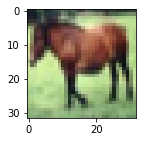

In [31]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[7])

In [35]:
classes[7]

'horse'

Here , we use the function , if the user can label the data indexes as  its should print the corresponding images and label

In [55]:
def plot_sample(X, y, index):
    plt.figure(figsize = (20,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

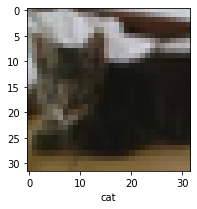

In [54]:
plot_sample(X_train, y_train, 9)

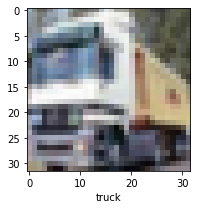

In [57]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [58]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [59]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

***Build simple artificial neural network for image classification***

In [61]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 375s 239ms/step - loss: 1.8947 - accuracy: 0.3292
Epoch 2/10
1563/1563 [==============================] - 372s 238ms/step - loss: 1.6552 - accuracy: 0.4033
Epoch 3/10
1563/1563 [==============================] - 365s 234ms/step - loss: 1.5781 - accuracy: 0.4319
Epoch 4/10
1563/1563 [==============================] - 380s 243ms/step - loss: 1.5272 - accuracy: 0.4553
Epoch 5/10
1563/1563 [==============================] - 380s 243ms/step - loss: 1.4902 - accuracy: 0.4653
Epoch 6/10
1563/1563 [==============================] - 386s 247ms/step - loss: 1.4579 - accuracy: 0.4778
Epoch 7/10
1563/1563 [==============================] - 364s 233ms/step - loss: 1.4295 - accuracy: 0.4884
Epoch 8/10
1563/1563 [==============================] - 358s 229ms/step - loss: 1.4045 - accuracy: 0.4983
Epoch 9/10
1563/1563 [==============================] - 369s 236ms/step - loss: 1.3836 - accuracy: 0.5061
Epoch 10/10
1563/1563 [=======================

In [63]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 11s 36ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.57      0.55      1000
           1       0.60      0.60      0.60      1000
           2       0.36      0.30      0.33      1000
           3       0.40      0.17      0.24      1000
           4       0.39      0.44      0.41      1000
           5       0.46      0.37      0.41      1000
           6       0.50      0.51      0.51      1000
           7       0.43      0.64      0.52      1000
           8       0.63      0.58      0.61      1000
           9       0.48      0.63      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



***Now let us build a convolutional neural network to train our images***

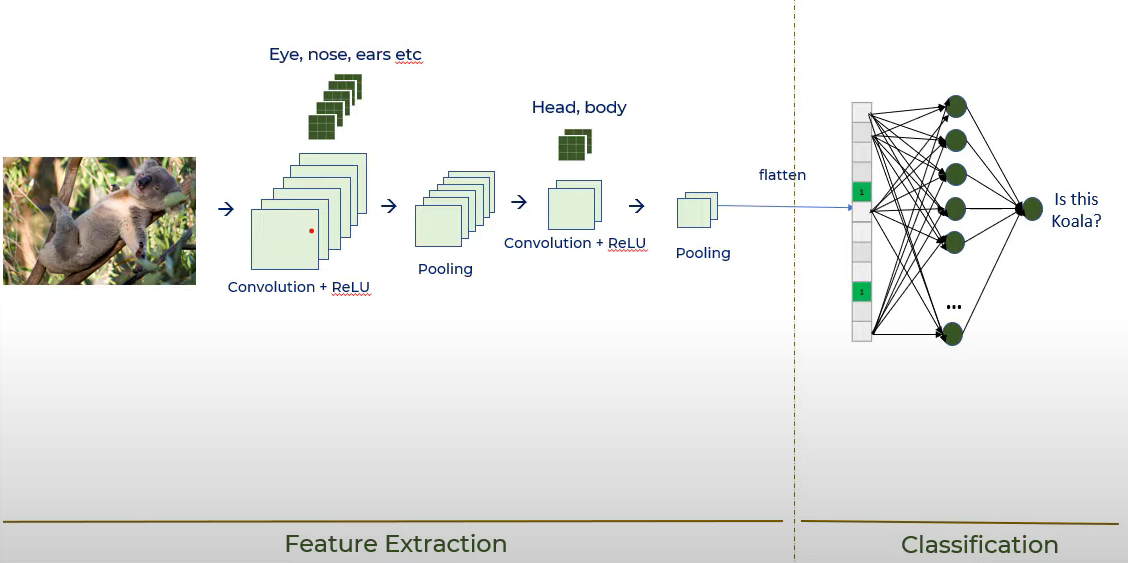

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4359 - accuracy: 0.4855
Epoch 2/50
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0917 - accuracy: 0.6199
Epoch 3/50
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9654 - accuracy: 0.6636
Epoch 4/50
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8859 - accuracy: 0.6930
Epoch 5/50
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8203 - accuracy: 0.7159
Epoch 6/50
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7706 - accuracy: 0.7327
Epoch 7/50
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7225 - accuracy: 0.7494
Epoch 8/50
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6838 - accuracy: 0.7627
Epoch 9/50
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6442 - accuracy: 0.7759
Epoch 10/50
1563/1563 [==============================] - 74s 47m

In [10]:
cnn.evaluate(X_test,y_test)

NameError: ignored

***Make prediction***

In [67]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[2.8967054e-04, 1.8181431e-04, 9.0928620e-04, 7.4994266e-01,
        4.9994029e-05, 2.4509403e-01, 2.6988010e-03, 5.1926792e-05,
        1.8968979e-04, 5.9200102e-04],
       [5.3822412e-04, 8.1725067e-01, 8.0366766e-07, 1.0803336e-06,
        1.9955821e-09, 2.4138544e-08, 6.9970063e-10, 7.0130360e-11,
        1.8164565e-01, 5.6344923e-04],
       [1.1261898e-02, 7.4008751e-01, 6.7330520e-03, 4.2481800e-03,
        8.9354208e-03, 1.0446211e-03, 4.1663083e-05, 3.0607595e-03,
        8.3926186e-02, 1.4066070e-01],
       [6.1598629e-01, 1.0929661e-01, 2.2209061e-02, 3.0420598e-02,
        9.9238912e-03, 1.4001843e-04, 1.5816728e-03, 4.2622021e-04,
        2.0877419e-01, 1.2415550e-03],
       [7.5484371e-07, 2.9978113e-05, 1.5652817e-02, 4.5457810e-02,
        8.6025938e-02, 8.1659378e-03, 8.4244019e-01, 6.0379175e-06,
        2.2192642e-03, 1.1292473e-06]], dtype=float32)

In [68]:
np.argmax(y_pred[0])

3

In [69]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

to compare the x test with y test , If the predicted value is correct or not 

In [70]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Actural value

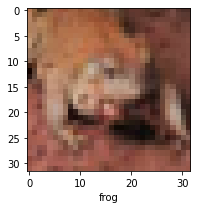

In [73]:
plot_sample(X_test, y_test,3)

predict value

In [74]:
classes[y_classes[3]]

'frog'